In [1]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

Load data

In [42]:
data = pd.read_csv("MI_complications.csv")
data.head(10)

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,6,64.0,1,0.0,1.0,2.0,1.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6,7,70.0,1,1.0,1.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
7,8,65.0,1,0.0,1.0,1.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8,9,60.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9,10,77.0,0,2.0,0.0,0.0,0.0,NaN,3.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [43]:
data.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 124 columns):
 #    Column         Dtype  
---   ------         -----  
 0    ID             int64  
 1    AGE            float64
 2    SEX            int64  
 3    INF_ANAM       float64
 4    STENOK_AN      float64
 5    FK_STENOK      float64
 6    IBS_POST       float64
 7    IBS_NASL       float64
 8    GB             float64
 9    SIM_GIPERT     float64
 10   DLIT_AG        float64
 11   ZSN_A          float64
 12   nr_11          float64
 13   nr_01          float64
 14   nr_02          float64
 15   nr_03          float64
 16   nr_04          float64
 17   nr_07          float64
 18   nr_08          float64
 19   np_01          float64
 20   np_04          float64
 21   np_05          float64
 22   np_07          float64
 23   np_08          float64
 24   np_09          float64
 25   np_10          float64
 26   endocr_01      float64
 27   endocr_02      float64
 28   endocr_03      f

In [44]:
data.describe()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,1700.000000,1692.000000,1700.000000,1696.000000,1594.000000,1627.000000,1649.000000,72.00000,1691.000000,1692.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,850.500000,61.856974,0.626471,0.554835,2.316186,1.205286,1.160703,0.37500,1.393258,0.033688,...,0.024706,0.041765,0.033529,0.093529,0.031765,0.044118,0.231765,0.093529,0.087059,0.477059
std,490.892045,11.259936,0.483883,0.836801,2.440586,1.040814,0.801400,0.48752,1.088803,0.180478,...,0.155273,0.200110,0.180067,0.291259,0.175425,0.205417,0.422084,0.291259,0.282004,1.381818
min,1.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,425.750000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,850.500000,63.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.00000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1275.250000,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,1.00000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1700.000000,92.000000,1.000000,3.000000,6.000000,4.000000,2.000000,1.00000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [45]:
labels = data.iloc[:, 112:124]
df = data.iloc[:, 1:111]

In [46]:
print(labels)

      FIBR_PREDS  PREDS_TAH  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  \
0              0          0          0           0         0          0   
1              0          0          0           0         0          0   
2              0          0          0           0         0          0   
3              0          0          0           0         0          0   
4              0          0          0           0         0          0   
...          ...        ...        ...         ...       ...        ...   
1695           0          0          0           0         1          0   
1696           0          0          0           0         0          0   
1697           0          0          0           0         0          0   
1698           0          0          0           0         0          1   
1699           0          0          0           0         0          0   

      RAZRIV  DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
0          0         0    0       0       

In [47]:
labels.loc[labels.LET_IS == 0, "Lethal_outcome"] = 0 #"Alive"
labels.loc[labels.LET_IS != 0, "Lethal_outcome"] = 1 #"Complication leading to death"


In [48]:
y = labels["Lethal_outcome"]

In [49]:
print(y)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1695    1.0
1696    1.0
1697    1.0
1698    1.0
1699    1.0
Name: Lethal_outcome, Length: 1700, dtype: float64


Dropping features missing X amount of data + data collected after day of admission.

In [50]:
#Features concerning information after day of admission
data.drop(data.columns[[92, 93, 94, 95, 100, 101, 102, 103, 104]], axis=1, inplace=True)

In [51]:
#features missing more than x amount of missing values
data.drop(["KFK_BLOOD", "IBS_NASL", "D_AD_KBRIG", "S_AD_KBRIG"], axis=1, inplace=True) #Check two last added features effect

In [52]:
#dropping irrelevant target labels of individual complications
data.drop(["ID", "FIBR_PREDS", "PREDS_TAH", "JELUD_TAH", "FIBR_JELUD", "A_V_BLOK", "OTEK_LANC", "RAZRIV", "DRESSLER", "ZSN", "REC_IM", "P_IM_STEN", "LET_IS"], axis=1, inplace=True)

#Maybe should not drop these?

In [53]:
#percentage of missing data per column
percent_missing = data.isnull().sum() * 100 / len(data)
print(percent_missing.sort_values(ascending=False))

NOT_NA_KB     40.352941
LID_KB        39.823529
NA_BLOOD      22.058824
GIPER_NA      22.058824
K_BLOOD       21.823529
                ...    
zab_leg_06     0.411765
NA_R_1_n       0.294118
INF_ANAM       0.235294
IM_PG_P        0.058824
SEX            0.000000
Length: 98, dtype: float64


In [54]:
print(data)

       AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST   GB  SIM_GIPERT  \
0     77.0    1       2.0        1.0        1.0       2.0  3.0         0.0   
1     55.0    1       1.0        0.0        0.0       0.0  0.0         0.0   
2     52.0    1       0.0        0.0        0.0       2.0  2.0         0.0   
3     68.0    0       0.0        0.0        0.0       2.0  2.0         0.0   
4     60.0    1       0.0        0.0        0.0       2.0  3.0         0.0   
...    ...  ...       ...        ...        ...       ...  ...         ...   
1695  77.0    0       0.0        4.0        2.0       1.0  2.0         0.0   
1696  70.0    0       0.0        6.0        2.0       1.0  2.0         0.0   
1697  55.0    1       3.0        6.0        2.0       2.0  0.0         0.0   
1698  79.0    0       2.0        2.0        2.0       1.0  2.0         0.0   
1699  63.0    1       2.0        NaN        NaN       NaN  2.0         0.0   

      DLIT_AG  ZSN_A  ...  LID_KB  NITR_S  NA_R_1_n  LID_S_n  B

In [55]:
data["target"] = y

In [56]:
data.iloc[:,-1:]

,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1695,1.0
1696,1.0
1697,1.0
1698,1.0


Top Features correlation

In [57]:
fe_target_corr = data.corr()["target"].drop("target")

sorted_outcome_correlations = fe_target_corr.abs().sort_values(ascending=False)

top_n = 10
top_features = sorted_outcome_correlations.index[:top_n]
top_correlations = data[top_features]

# Correlation matrix for the top features
top_correlation_matrix = top_correlations.corr()

print(top_correlation_matrix)


               K_SH_POST  D_AD_ORIT  S_AD_ORIT     ZSN_A  ritm_ecg_p_01  \
K_SH_POST       1.000000  -0.539925  -0.448300  0.079698      -0.167709   
D_AD_ORIT      -0.539925   1.000000   0.861266 -0.078148       0.107720   
S_AD_ORIT      -0.448300   0.861266   1.000000 -0.057675       0.117550   
ZSN_A           0.079698  -0.078148  -0.057675  1.000000      -0.160043   
ritm_ecg_p_01  -0.167709   0.107720   0.117550 -0.160043       1.000000   
NITR_S          0.064785  -0.021073  -0.020617  0.080231      -0.133666   
AGE             0.064728  -0.049489   0.043821  0.131705      -0.132823   
ASP_S_n        -0.220789   0.209357   0.171374 -0.066541       0.053187   
L_BLOOD         0.084645  -0.155752  -0.144040  0.063146      -0.113782   
STENOK_AN       0.061722  -0.032924   0.005214  0.103871      -0.067054   

                 NITR_S       AGE   ASP_S_n   L_BLOOD  STENOK_AN  
K_SH_POST      0.064785  0.064728 -0.220789  0.084645   0.061722  
D_AD_ORIT     -0.021073 -0.049489  0.209

In [70]:
top_correlation_matrix.style.background_gradient(cmap='coolwarm').format(precision=3)

,K_SH_POST,D_AD_ORIT,S_AD_ORIT,ZSN_A,ritm_ecg_p_01,NITR_S,AGE,ASP_S_n,L_BLOOD,STENOK_AN
K_SH_POST,1.000,-0.540,-0.448,0.080,-0.168,0.065,0.065,-0.221,0.085,0.062
D_AD_ORIT,-0.540,1.000,0.861,-0.078,0.108,-0.021,-0.049,0.209,-0.156,-0.033
S_AD_ORIT,-0.448,0.861,1.000,-0.058,0.118,-0.021,0.044,0.171,-0.144,0.005
ZSN_A,0.080,-0.078,-0.058,1.000,-0.160,0.080,0.132,-0.067,0.063,0.104
ritm_ecg_p_01,-0.168,0.108,0.118,-0.160,1.000,-0.134,-0.133,0.053,-0.114,-0.067
NITR_S,0.065,-0.021,-0.021,0.080,-0.134,1.000,0.082,-0.017,0.102,0.103
AGE,0.065,-0.049,0.044,0.132,-0.133,0.082,1.000,-0.051,0.003,0.233
ASP_S_n,-0.221,0.209,0.171,-0.067,0.053,-0.017,-0.051,1.000,-0.067,-0.042
L_BLOOD,0.085,-0.156,-0.144,0.063,-0.114,0.102,0.003,-0.067,1.000,-0.026
STENOK_AN,0.062,-0.033,0.005,0.104,-0.067,0.103,0.233,-0.042,-0.026,1.000


In [59]:
data.drop(["target"], axis=1, inplace=True)

In [ ]:
#Still plot information gain of features


Test/train Split

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, stratify=y, random_state = 42)


print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1360, 98) (340, 98)
(1360,) (340,)


Imputing missing values

In [61]:
#MICE missing data imputation

import miceforest as mf
# Create kernel. 
kds_train = mf.ImputationKernel(
  X_train,
  random_state=42
)

kds_test = mf.ImputationKernel( 
  X_test,
  random_state=42
)

#Check for imputed value performance!!
kds_train.mice(iterations=5, n_estimators=50)
kds_test.mice(iterations=5, n_estimators=50)

# Return the completed dataset.
X_train = kds_train.complete_data()
X_test = kds_test.complete_data()



TabNet model

In [22]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from pytorch_tabnet.augmentations import ClassificationSMOTE

In [62]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier

tab = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type= "sparsemax"
                       )

## Code retrieved from: https://github.com/dreamquark-ai/tabnet/blob/develop/multi_task_example.ipynb

c:\Users\renee\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [63]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

tab.fit(X_train.values, y_train)

y_pred_tab = tab.predict(X_test.values)


c:\Users\renee\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.93936 |  0:00:00s
epoch 1  | loss: 0.78718 |  0:00:00s
epoch 2  | loss: 0.67065 |  0:00:00s
epoch 3  | loss: 0.61067 |  0:00:00s
epoch 4  | loss: 0.58664 |  0:00:00s
epoch 5  | loss: 0.5361  |  0:00:00s
epoch 6  | loss: 0.53266 |  0:00:00s
epoch 7  | loss: 0.49309 |  0:00:00s
epoch 8  | loss: 0.49092 |  0:00:00s
epoch 9  | loss: 0.48407 |  0:00:00s
epoch 10 | loss: 0.44421 |  0:00:00s
epoch 11 | loss: 0.46488 |  0:00:01s
epoch 12 | loss: 0.48285 |  0:00:01s
epoch 13 | loss: 0.43674 |  0:00:01s
epoch 14 | loss: 0.43759 |  0:00:01s
epoch 15 | loss: 0.42999 |  0:00:01s
epoch 16 | loss: 0.4292  |  0:00:01s
epoch 17 | loss: 0.423   |  0:00:01s
epoch 18 | loss: 0.43974 |  0:00:01s
epoch 19 | loss: 0.41906 |  0:00:01s
epoch 20 | loss: 0.42782 |  0:00:01s
epoch 21 | loss: 0.42034 |  0:00:01s
epoch 22 | loss: 0.42973 |  0:00:01s
epoch 23 | loss: 0.39828 |  0:00:02s
epoch 24 | loss: 0.42165 |  0:00:02s
epoch 25 | loss: 0.40046 |  0:00:02s
epoch 26 | loss: 0.41632 |  0:00:02s
e

In [64]:
print(classification_report(y_test, y_pred_tab, digits=3, zero_division=1))
cohen_kappa_score(y_test, y_pred_tab)

              precision    recall  f1-score   support

         0.0      0.870     0.843     0.856       286
         1.0      0.286     0.333     0.308        54

    accuracy                          0.762       340
   macro avg      0.578     0.588     0.582       340
weighted avg      0.777     0.762     0.769       340



0.16484716157205237

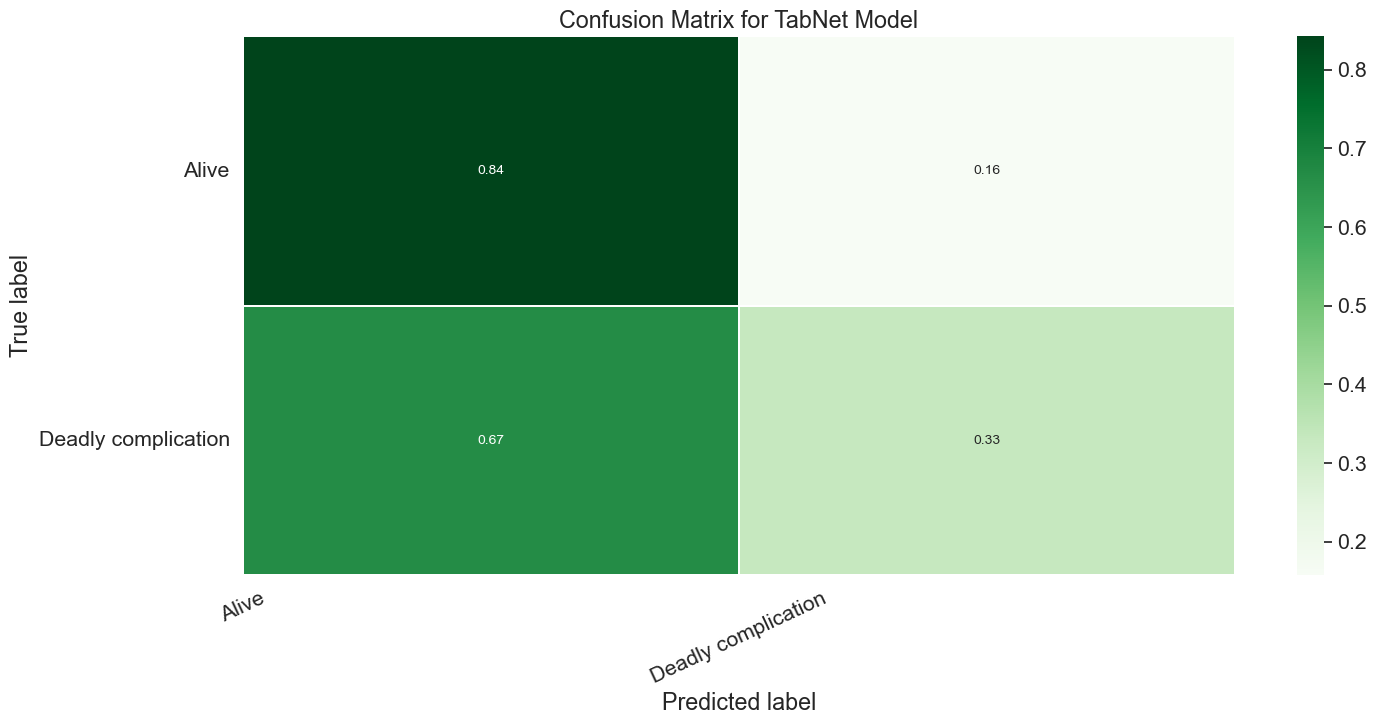

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_tab)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ["Alive", "Deadly complication"]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for TabNet Model')
plt.show()

In [ ]:
#Change scoring metric to "auc" and use Gridsearch instead of randomsearchCV. Look into the hyperparameters

#https://www.kaggle.com/code/enigmak/tabnet-deep-neural-network-for-tabular-data  <-- look here

Optimized TabNet model

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from pytorch_tabnet.augmentations import ClassificationSMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

tab_pipeline = imbpipeline(steps = [["smote", SMOTE(random_state=42)],
                                ["scaler", StandardScaler()],  #StandarScaler necessary for TabNet?
                                ["tab_classifier", TabNetClassifier(seed = 42)]]) #Check if works with seed

stratified_kfold = StratifiedKFold(n_splits=3,
                                   shuffle=True,
                                   random_state=42)

tab_param_grid = {
    "tab_classifier__n_steps": [3, 5, 7, 9],
    "tab_classifier__gamma": [ 1.0, 1.3, 1.7, 2.0],
    "tab_classifier__n_independent": [1, 2, 3, 4],
    "tab_classifier__n_shared": [1, 2, 3, 4],
    "tab_classifier__momentum": [0.02, 0.05, 0.1, 0.4]
}

#tab_grid_search = RandomizedSearchCV(
    #estimator=tab_pipeline,
    #param_distributions=tab_param_grid,
    #n_iter=30,
    #cv=10,
    #n_jobs=-1,
    #scoring="f1", #f1 score maybe
    #verbose=2,
    #random_state=42
#)

tab_grid_search = GridSearchCV(estimator=tab_pipeline,
                           param_grid=tab_param_grid,
                           scoring="f1",
                           cv=stratified_kfold,
                           n_jobs=-1)

tab_grid_search.fit(X_train, y_train)
cv_score_tab = tab_grid_search.best_score_
test_score_tab = tab_grid_search.score(X_test, y_test)
print(f"Cross-validation score: {cv_score_tab}\nTest score: {test_score_tab}")

best_params_tab = tab_grid_search.best_params_
print("Best Parameters:", best_params_tab)

#4.5 hours

c:\Users\renee\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
c:\Users\renee\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
c:\Users\renee\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.80456 |  0:00:00s
epoch 1  | loss: 0.75276 |  0:00:00s
epoch 2  | loss: 0.69409 |  0:00:00s
epoch 3  | loss: 0.66842 |  0:00:00s
epoch 4  | loss: 0.65637 |  0:00:00s
epoch 5  | loss: 0.65075 |  0:00:00s
epoch 6  | loss: 0.63188 |  0:00:00s
epoch 7  | loss: 0.62432 |  0:00:00s
epoch 8  | loss: 0.60934 |  0:00:00s
epoch 9  | loss: 0.59303 |  0:00:01s
epoch 10 | loss: 0.58084 |  0:00:01s
epoch 11 | loss: 0.5709  |  0:00:01s
epoch 12 | loss: 0.56746 |  0:00:01s
epoch 13 | loss: 0.56153 |  0:00:01s
epoch 14 | loss: 0.5487  |  0:00:01s
epoch 15 | loss: 0.53479 |  0:00:01s
epoch 16 | loss: 0.52938 |  0:00:01s
epoch 17 | loss: 0.51537 |  0:00:01s
epoch 18 | loss: 0.51079 |  0:00:02s
epoch 19 | loss: 0.52227 |  0:00:02s
epoch 20 | loss: 0.50306 |  0:00:02s
epoch 21 | loss: 0.49075 |  0:00:02s
epoch 22 | loss: 0.49744 |  0:00:02s
epoch 23 | loss: 0.47964 |  0:00:02s
epoch 24 | loss: 0.46796 |  0:00:02s
epoch 25 | loss: 0.45471 |  0:00:02s
epoch 26 | loss: 0.45304 |  0:00:02s
e

In [66]:
y_pred_tabnet = tab_grid_search.predict(X_test)

print(classification_report(y_test, y_pred_tabnet, digits=3, zero_division=1))
cohen_kappa_score(y_test, y_pred_tabnet)

              precision    recall  f1-score   support

         0.0      0.904     0.860     0.882       286
         1.0      0.412     0.519     0.459        54

    accuracy                          0.806       340
   macro avg      0.658     0.689     0.670       340
weighted avg      0.826     0.806     0.815       340



0.3426294820717132

In [87]:
tab_grid_search.score(X_train, y_train)

0.9012875536480687

In [72]:
roc_auc_score(y_test, y_pred_tabnet)

0.6893291893291893

TabNet Confusion Matrix With SMOTE and hyperparameter tuning

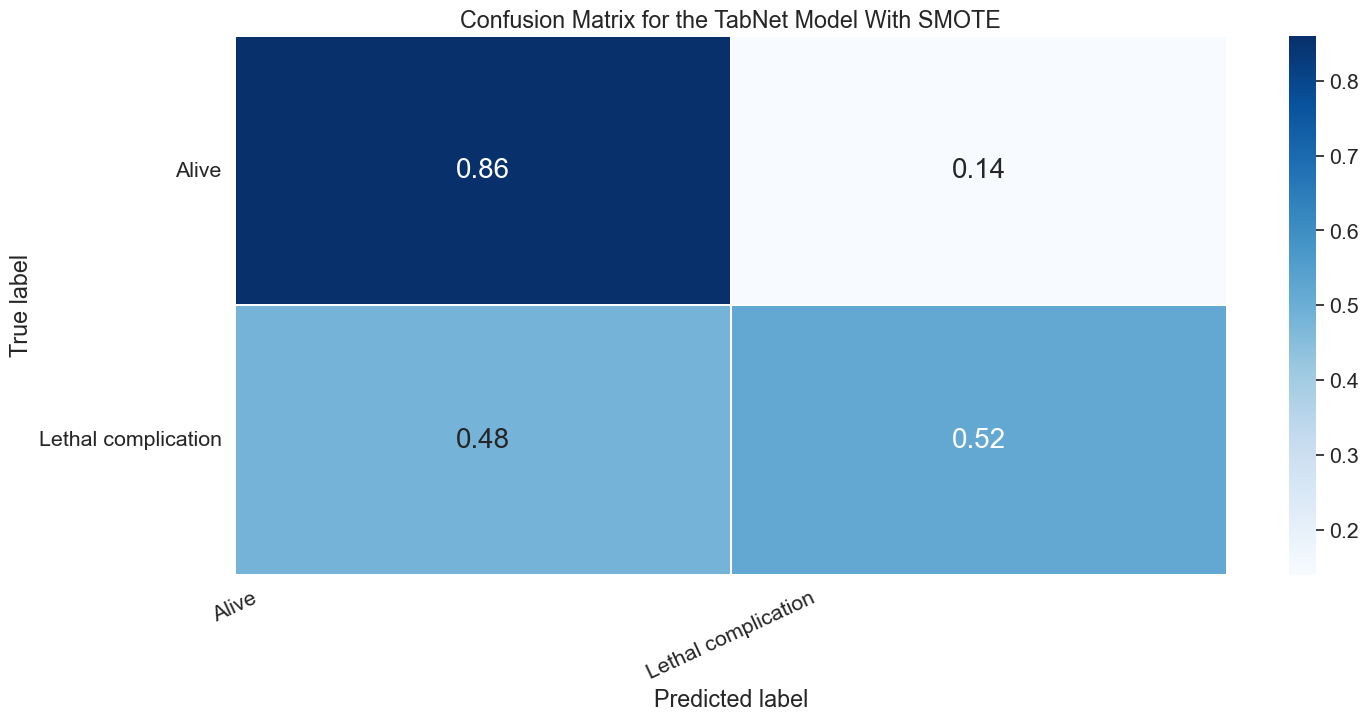

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_tabnet)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':20},
            cmap=plt.cm.Blues, linewidths=0.2)

# Add labels to the plot
class_names = ["Alive", "Lethal complication"]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for the TabNet Model With SMOTE')
plt.show()

TabNet Learning Curve Accuracy 

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assuming you have your best estimator from the grid search
best_estimator = tab_grid_search.best_estimator_

# Create a learning curve for accuracy
train_sizes, train_scores, test_scores = learning_curve(
    best_estimator, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=stratified_kfold)

# Calculate mean and standard deviation of accuracy for training and test sets
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Create a plot of the learning curve for accuracy
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, marker='o', markersize=5, label='Test Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15)
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve for Accuracy')

# Adjust the limits of the y-axis to increase the range
plt.ylim(0.7, 1.0)  # You can adjust the range (0.7 to 1.0 in this example)
plt.grid()
plt.show()

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ['tab_classifier',
                 TabNetClassifier(cat_dims=[], cat_idxs=[], input_dim=98, n_independent=1, n_shared=1, optimizer_params={'lr': 0.02}, output_dim=2, scheduler_params={}, seed=42)]]) does not.

TabNet Learning Curve Loss

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import log_loss

# Assuming you have your best estimator from the grid search
best_estimator = tab_grid_search.best_estimator_

# Create a custom scoring function for log loss
def custom_scoring(estimator, X, y):
    y_pred = estimator.predict_proba(X)
    return -log_loss(y, y_pred)

# Create a learning curve for log loss
train_sizes, train_scores, test_scores = learning_curve(
    best_estimator, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=stratified_kfold, scoring=custom_scoring)

# Calculate mean and standard deviation of log loss for training and test sets
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Create a plot of the learning curve for loss
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, marker='o', markersize=5, label='Training Loss')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, marker='o', markersize=5, label='Test Loss')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15)
plt.xlabel('Number of Training Samples')
plt.ylabel('Loss (log loss)')
plt.legend()
plt.title('Learning Curve for Loss')

# Adjust the limits of the y-axis to increase the range
plt.ylim(0.2, 0.8)  # You can adjust the range (0 to 2 in this example)
plt.grid()
plt.show()


#Help from Chatgpt

TabNet without SMOTE

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from pytorch_tabnet.augmentations import ClassificationSMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

tab_pipeline_nosmote = imbpipeline(steps = [["scaler", StandardScaler()],  #StandarScaler necessary for TabNet?
                                ["tab_classifier", TabNetClassifier(seed = 42)]]) #Check if works with seed

stratified_kfold = StratifiedKFold(n_splits=3,
                                   shuffle=True,
                                   random_state=42)

tab_param_grid = {
    "tab_classifier__n_steps": [3, 5, 7, 9],
    "tab_classifier__gamma": [ 1.0, 1.3, 1.7, 2.0],
    "tab_classifier__n_independent": [1, 2, 3, 4],
    "tab_classifier__n_shared": [1, 2, 3, 4],
    "tab_classifier__momentum": [0.02, 0.05, 0.1, 0.4]
}

tab_grid_search_nosmote = GridSearchCV(estimator=tab_pipeline_nosmote,
                           param_grid=tab_param_grid,
                           scoring="f1",
                           cv=stratified_kfold,
                           n_jobs=-1)

tab_grid_search_nosmote.fit(X_train, y_train)
Y_pred_nosmote = tab_grid_search_nosmote.predict(X_test)
cv_score_tab_nosmote = tab_grid_search_nosmote.best_score_
test_score_tab_nosmote = tab_grid_search_nosmote.score(X_test, y_test)
print(f"Cross-validation score: {cv_score_tab_nosmote}\nTest score: {test_score_tab_nosmote}")

best_params_tab_nosmote = tab_grid_search_nosmote.best_params_
print("Best Parameters:", best_params_tab_nosmote)

c:\Users\renee\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
c:\Users\renee\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
c:\Users\renee\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.71799 |  0:00:00s
epoch 1  | loss: 0.62504 |  0:00:00s
epoch 2  | loss: 0.53088 |  0:00:00s
epoch 3  | loss: 0.5006  |  0:00:00s
epoch 4  | loss: 0.50315 |  0:00:00s
epoch 5  | loss: 0.49614 |  0:00:00s
epoch 6  | loss: 0.48019 |  0:00:00s
epoch 7  | loss: 0.48338 |  0:00:00s
epoch 8  | loss: 0.49359 |  0:00:00s
epoch 9  | loss: 0.48408 |  0:00:00s
epoch 10 | loss: 0.45136 |  0:00:01s
epoch 11 | loss: 0.45359 |  0:00:01s
epoch 12 | loss: 0.43443 |  0:00:01s
epoch 13 | loss: 0.459   |  0:00:01s
epoch 14 | loss: 0.44443 |  0:00:01s
epoch 15 | loss: 0.42469 |  0:00:01s
epoch 16 | loss: 0.41847 |  0:00:01s
epoch 17 | loss: 0.4278  |  0:00:01s
epoch 18 | loss: 0.41768 |  0:00:01s
epoch 19 | loss: 0.41843 |  0:00:01s
epoch 20 | loss: 0.41709 |  0:00:02s
epoch 21 | loss: 0.389   |  0:00:02s
epoch 22 | loss: 0.41857 |  0:00:02s
epoch 23 | loss: 0.39651 |  0:00:02s
epoch 24 | loss: 0.38433 |  0:00:02s
epoch 25 | loss: 0.37464 |  0:00:02s
epoch 26 | loss: 0.37143 |  0:00:02s
e

In [80]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_tabnet_nosmote)

0.5923983423983423

In [85]:
tab_train_pred = tab_grid_search_nosmote.predict(X_train)

accuracy_score(y_train, tab_train_pred )

0.8889705882352941

In [82]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_tabnet_nosmote)

0.24074074074074073

In [84]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred_tabnet_nosmote)

0.3132530120481928

In [69]:
y_pred_tabnet_nosmote = tab_grid_search_nosmote.predict(X_test)

print(classification_report(y_test, y_pred_tabnet_nosmote, digits=3, zero_division=1))
cohen_kappa_score(y_test, y_pred_tabnet_nosmote)

              precision    recall  f1-score   support

         0.0      0.868     0.944     0.905       286
         1.0      0.448     0.241     0.313        54

    accuracy                          0.832       340
   macro avg      0.658     0.592     0.609       340
weighted avg      0.801     0.832     0.811       340



0.22751913265306112

In [76]:
test_score_tab_noscale = tab_grid_search_noscale.score(X_test, y_test)
print(f"Cross-validation score: {cv_score_tab_noscale}\nTest score: {test_score_tab_noscale}")

best_params_tab_noscale = tab_grid_search_noscale.best_params_
print("Best Parameters:", best_params_tab_noscale)

Cross-validation score: 0.42058176779287626
Test score: 0.3980582524271845
Best Parameters: {'tab_classifier__gamma': 1.0, 'tab_classifier__momentum': 0.02, 'tab_classifier__n_independent': 1, 'tab_classifier__n_shared': 2, 'tab_classifier__n_steps': 3}


In [78]:
y_pred_tabnet_noscale = tab_grid_search_noscale.predict(X_test.values)

print(classification_report(y_test, y_pred_tabnet_noscale, digits=3, zero_division=1))
cohen_kappa_score(y_test, y_pred_tabnet_nosmote)

              precision    recall  f1-score   support

         0.0      0.931     0.612     0.738       286
         1.0      0.270     0.759     0.398        54

    accuracy                          0.635       340
   macro avg      0.600     0.686     0.568       340
weighted avg      0.826     0.635     0.684       340



0.22751913265306112